In [8]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import os # librería para interactuar con el sistema de archivos 

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

# Archivos
sca_dir = 'DATA/sca/'
archivos_sca = os.listdir(sca_dir)
print("Archivos sca cargados:",', '.join(archivos_sca))

Archivos sca cargados: parte1-caso1.csv, parte1-caso2.csv


## Caso 1

In [35]:
caso = 0

## Grafico de buffer en el generador
print("archivo de grafico: ",archivos_sca[caso])
data = pandas.read_csv(sca_dir + archivos_sca[caso])


archivo de grafico:  parte1-caso1.csv


### Ocupacion de buffers en el sistema

<function matplotlib.pyplot.show(close=None, block=None)>

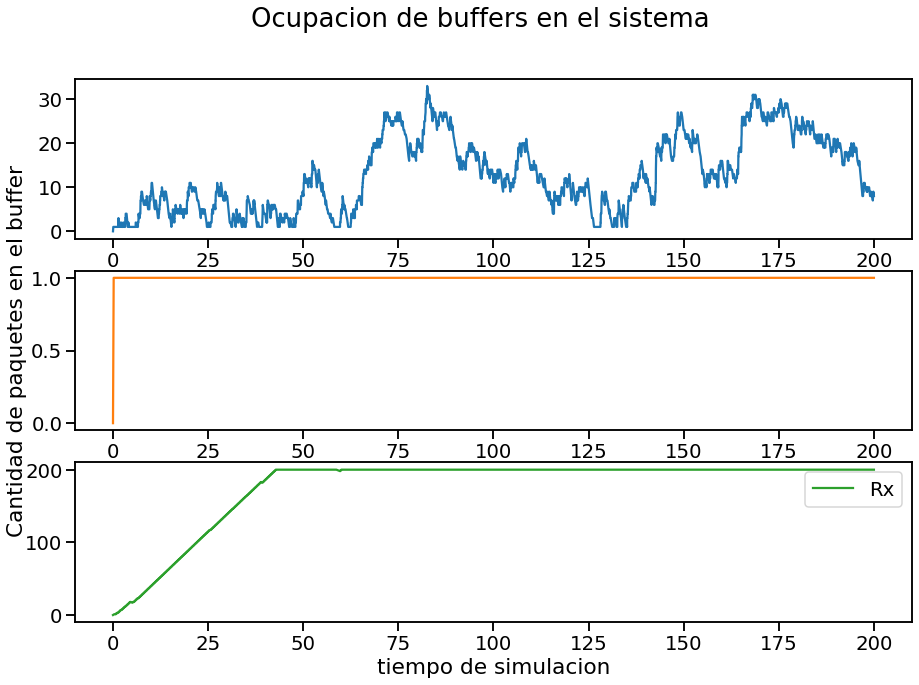

In [27]:
# Extraemos los valores de nuestro "vector" de las celdas 23, 24 y 25
time_gen = data['vectime'].loc[[23]].tolist()
buffer_gen = data['vecvalue'].loc[[23]].tolist()

time_queue = data['vectime'].loc[[24]].tolist()
buffer_queue = data['vecvalue'].loc[[24]].tolist()

time_sink = data['vectime'].loc[[25]].tolist()
buffer_sink = data['vecvalue'].loc[[25]].tolist()

# convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
time_gen = list(map(float,time_gen[0].split()))
time_queue = list(map(float,time_queue[0].split()))
time_sink = list(map(float,time_sink[0].split()))
buffer_gen = list(map(float,buffer_gen[0].split()))
buffer_queue = list(map(float,buffer_queue[0].split()))
buffer_sink = list(map(float,buffer_sink[0].split()))

# Graficamos
fig, ax = plt.subplots(3,figsize=(15, 10))
fig.suptitle('Ocupacion de buffers en el sistema')
ax[0].plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
ax[1].plot(time_queue,buffer_queue, color='tab:orange', label="Nx")
ax[2].plot(time_sink,buffer_sink, color='tab:green', label="Rx")
plt.title('')
plt.xlabel("tiempo de simulacion")
ax[1].set_ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Paquetes generados y paquetes consumidos

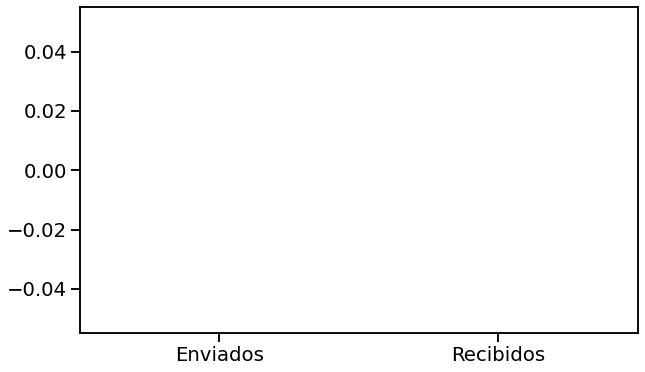

Paquetes enviados: nan
Paquetes recibidos 0.0


In [11]:
# FIXME: datos no cargados
# Extraemos la info
time_gen = data['vectime'].loc[[22]].tolist()
packets_gen = data['vecvalue'].loc[[22]].tolist()
time_sink = data['vectime'].loc[[27]].tolist()
packets_sink = data['vecvalue'].loc[[27]].tolist()

# Convertimos los valores a flotantes
time_gen = float(time_gen[0])
packets_gen = float(packets_gen[0])
time_sink = float(time_sink[0])
packets_sink = float(packets_sink[0])

# Graficamos
plt.figure(figsize=(10,6))
seaborn.barplot(
    x=['Enviados', 'Recibidos'],
    y=[packets_gen, packets_sink])
plt.show()

print("Paquetes enviados:", packets_gen)
print("Paquetes recibidos", packets_sink)


## Carga util vs carga recibida/ofrecida
Los datos se sacan de todos los casos

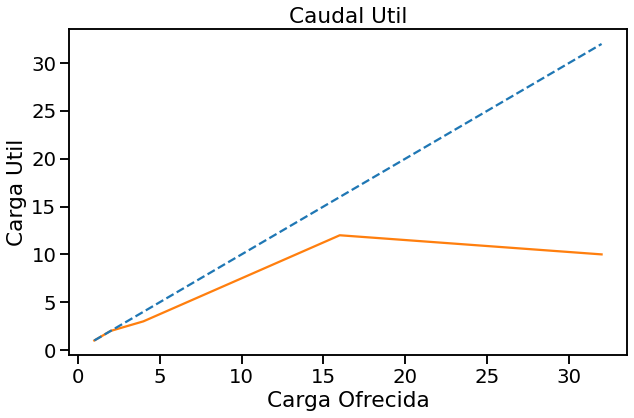

In [33]:
# FIXME: datos de ejemplo, cargar reales

# Carga Util de los casos 1,...,n = cUtil
# Carga ofrecida de los casos 1,...,n = cOfrecida

cUtil = [1,2,4,8,16,32]     # X
cOfrecida = [1,2,3,6,12,10] # Y

# Graficamos el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cUtil, cOfrecida, color='tab:orange', label='Carga Recibida')
plt.plot(cUtil, cUtil, color='tab:blue', label='Carga Esperada', linestyle='--')
plt.title('Caudal Util')
plt.xlabel('Carga Ofrecida')
plt.ylabel('Carga Util')
plt.show()

# FIXME: no esta en paquetes por segundo, no se bien como seria graficar el esperado.